In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from glas_o_mat import dataset as ds

In [96]:
data = ds.create_dataset()

In [97]:
data.activities

,TRANSACTION_ID,CONTAINER_ID,SLIDER_LEVEL,CV_LEVEL,SENSOR_LEVEL,IMAGE_ID,PHONE_ID,RECORDED_AT,COMMENT,IS_EMPTIED,LATITUDE,LONGITUDE,CREATED_AT,UPDATED_AT,ROUTE_ID,LOCATION_ID,MATERIAL_ID,DATE,INTERVAL,EMPTIED_INTERVAL
0,2,1001101101100271211,20,NaN,NaN,1001101101100271211/2023-09-28T06:36:05.355751...,TP1A.220624.014_2,2023-09-26 06:36:05,NaN,1,49.455948,7.791700,2023-10-13 11:18:58.0,NaN,NaN,100110110110027,12,2023-09-26,NaT,NaT
1,1,1001101101100271111,30,NaN,NaN,1001101101100271111/2023-09-28T06:36:48.022095...,TP1A.220624.014_2,2023-09-26 06:36:48,NaN,1,49.455948,7.791700,2023-10-13 11:18:58.0,NaN,NaN,100110110110027,11,2023-09-26,NaT,NaT
2,3,1001101101100271311,10,NaN,NaN,1001101101100271311/2023-09-28T06:37:16.029149...,TP1A.220624.014_2,2023-09-26 06:37:16,NaN,0,49.455948,7.791700,2023-10-13 11:18:58.0,NaN,NaN,100110110110027,13,2023-09-26,NaT,NaT
3,6,1001101101100191311,10,NaN,NaN,1001101101100191311/2023-09-28T06:50:59.338075...,TP1A.220624.014_2,2023-09-26 06:50:59,NaN,0,49.448544,7.769812,2023-10-13 11:18:58.0,NaN,NaN,100110110110019,13,2023-09-26,NaT,NaT
4,4,1001101101100191111,0,NaN,NaN,1001101101100191111/2023-09-28T06:51:15.117682...,TP1A.220624.014_2,2023-09-26 06:51:15,NaN,0,49.448544,7.769812,2023-10-13 11:18:58.0,NaN,NaN,100110110110019,11,2023-09-26,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41458,61152,1001101101100531212,90,NaN,NaN,1001101101100531212/2024-10-17T14:46:54.523517...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:46:55,NaN,1,49.494200,49.494200,2024-10-17 12:47:33.0,2024-10-17 12:47:33.0,2024-10-17-1001101101-0,100110110110053,12,2024-10-17,1 days 05:23:18,15 days 06:47:14
41459,61149,1001101101100531111,90,NaN,NaN,1001101101100531111/2024-10-17T14:47:02.646031...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:47:03,NaN,1,49.494200,49.494200,2024-10-17 12:47:31.0,2024-10-17 12:47:31.0,2024-10-17-1001101101-0,100110110110053,11,2024-10-17,1 days 05:23:56,15 days 06:47:11
41460,61150,1001101101100531112,90,NaN,NaN,1001101101100531112/2024-10-17T14:47:10.767846...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:47:11,NaN,1,49.494200,49.494200,2024-10-17 12:47:32.0,2024-10-17 12:47:32.0,2024-10-17-1001101101-0,100110110110053,11,2024-10-17,1 days 05:23:53,15 days 06:47:09
41461,61153,1001101101100531311,20,NaN,NaN,1001101101100531311/2024-10-17T14:47:19.611355...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:47:20,NaN,0,49.494200,49.494200,2024-10-17 12:47:34.0,2024-10-17 12:47:34.0,2024-10-17-1001101101-0,100110110110053,13,2024-10-17,1 days 05:24:33,NaT


In [123]:
df = data.activities[['RECORDED_AT', 'LOCATION_ID', 'CONTAINER_ID', 'MATERIAL_ID']]
lastActivity = df.groupby('CONTAINER_ID')['RECORDED_AT'].agg(['min', 'max'])
df = df.merge(lastActivity, on='CONTAINER_ID')
df['DATE'] = df['RECORDED_AT'].dt.date
df['min'] = df['min'].dt.date
df['max'] = df['max'].dt.date
df

,RECORDED_AT,LOCATION_ID,CONTAINER_ID,MATERIAL_ID,min,max,DATE
0,2023-09-26 06:36:05,100110110110027,1001101101100271211,12,2023-09-26,2024-10-17,2023-09-26
1,2023-09-26 06:36:48,100110110110027,1001101101100271111,11,2023-09-26,2024-10-17,2023-09-26
2,2023-09-26 06:37:16,100110110110027,1001101101100271311,13,2023-09-26,2024-10-17,2023-09-26
3,2023-09-26 06:50:59,100110110110019,1001101101100191311,13,2023-09-26,2024-10-16,2023-09-26
4,2023-09-26 06:51:15,100110110110019,1001101101100191111,11,2023-09-26,2024-10-16,2023-09-26
...,...,...,...,...,...,...,...
41458,2024-10-17 14:46:55,100110110110053,1001101101100531212,12,2024-01-02,2024-10-17,2024-10-17
41459,2024-10-17 14:47:03,100110110110053,1001101101100531111,11,2023-09-27,2024-10-17,2024-10-17
41460,2024-10-17 14:47:11,100110110110053,1001101101100531112,11,2024-04-22,2024-10-17,2024-10-17
41461,2024-10-17 14:47:20,100110110110053,1001101101100531311,13,2023-09-27,2024-10-17,2024-10-17


In [150]:
maxDate = df['RECORDED_AT'].max()
dfCount = df.drop_duplicates(subset=['DATE', 'CONTAINER_ID'])
last_loc = dfCount.groupby(['LOCATION_ID', 'MATERIAL_ID'])['RECORDED_AT'].max().dt.date
last_loc.name = 'LAST'
dfCount = dfCount.merge(last_loc, on=['LOCATION_ID', 'MATERIAL_ID'])
dfCount['new'] = dfCount['min'] == dfCount['DATE']
dfCount['old'] = (dfCount['max'] == dfCount['DATE'])
dfCount['new'] = dfCount['new'].astype(int)
dfCount['old'] = dfCount['old'].astype(int) * -1
dfCount['old'] = dfCount.groupby(['LOCATION_ID', 'MATERIAL_ID'])['old'].shift(1).fillna(0).astype(int)
dfCount['COUNT'] = dfCount['new'] + dfCount['old']
dfCount[(dfCount['LOCATION_ID'] == 100110110210098) & (dfCount['MATERIAL_ID'] == 12)]

,RECORDED_AT,LOCATION_ID,CONTAINER_ID,MATERIAL_ID,min,max,DATE,LAST,new,old,COUNT
323,2023-10-02 11:05:57,100110110210098,1001101102100981211,12,2023-10-02,2024-08-12,2023-10-02,2024-08-12,1,0,1
324,2023-10-02 11:06:09,100110110210098,1001101102100981212,12,2023-10-02,2024-08-12,2023-10-02,2024-08-12,1,0,1
325,2023-10-02 11:06:24,100110110210098,1001101102100981213,12,2023-10-02,2024-08-12,2023-10-02,2024-08-12,1,0,1
767,2023-10-09 10:55:28,100110110210098,1001101102100981211,12,2023-10-02,2024-08-12,2023-10-09,2024-08-12,0,0,0
768,2023-10-09 10:55:42,100110110210098,1001101102100981212,12,2023-10-02,2024-08-12,2023-10-09,2024-08-12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
33147,2024-08-09 10:08:20,100110110210098,1001101102100981212,12,2023-10-02,2024-08-12,2024-08-09,2024-08-12,0,0,0
33148,2024-08-09 10:08:28,100110110210098,1001101102100981213,12,2023-10-02,2024-08-12,2024-08-09,2024-08-12,0,0,0
33336,2024-08-12 13:09:33,100110110210098,1001101102100981211,12,2023-10-02,2024-08-12,2024-08-12,2024-08-12,0,0,0
33337,2024-08-12 13:09:44,100110110210098,1001101102100981212,12,2023-10-02,2024-08-12,2024-08-12,2024-08-12,0,-1,-1


In [151]:
dfCount = dfCount[['LOCATION_ID', 'MATERIAL_ID', 'COUNT', 'DATE']].groupby(['LOCATION_ID', 'MATERIAL_ID', 'DATE']).sum()
dfCount['COUNT'] = dfCount.groupby(['LOCATION_ID', 'MATERIAL_ID'])['COUNT'].cumsum()
dfCount = dfCount.reset_index()
dfCount.to_csv('counter_count.csv', index=False)
dfCount

,LOCATION_ID,MATERIAL_ID,DATE,COUNT
0,10011019999,11,2024-03-08,1
1,10011019999,12,2024-03-08,1
2,10011019999,13,2024-03-08,1
3,100110110200,11,2024-09-09,1
4,100110110200,12,2024-09-09,1
...,...,...,...,...
36170,100210110101158,13,2024-04-10,1
36171,100210110101158,13,2024-04-17,1
36172,100210110101158,13,2024-05-28,1
36173,100210110101158,13,2024-05-29,1


In [130]:
dfCount[(dfCount['LOCATION_ID'] == 100110110210093) & (dfCount['MATERIAL_ID'] == 12)]

,LOCATION_ID,MATERIAL_ID,DATE,COUNT
25991,100110110210093,12,2023-10-05,1
25992,100110110210093,12,2023-10-18,1
25993,100110110210093,12,2024-02-28,1
25994,100110110210093,12,2024-03-20,1
25995,100110110210093,12,2024-04-18,1
25996,100110110210093,12,2024-05-02,1
25997,100110110210093,12,2024-05-15,1
25998,100110110210093,12,2024-06-19,1
25999,100110110210093,12,2024-06-26,1
26000,100110110210093,12,2024-08-14,1


In [100]:
dates = df.groupby(['LOCATION_ID', 'MATERIAL_ID'])['DATE'].unique()
dates

LOCATION_ID      MATERIAL_ID
10011019999      11                                                  [2024-03-08]
                 12                                                  [2024-03-08]
                 13                                                  [2024-03-08]
100110110200     11                                                  [2024-09-09]
                 12                                                  [2024-09-09]
                                                      ...                        
100210110101157  12             [2024-03-13, 2024-03-20, 2024-04-02, 2024-04-1...
                 13             [2024-03-13, 2024-03-20, 2024-04-02, 2024-04-1...
100210110101158  11             [2024-02-28, 2024-03-06, 2024-03-20, 2024-03-2...
                 12             [2024-02-28, 2024-03-06, 2024-03-20, 2024-03-2...
                 13             [2024-03-06, 2024-03-20, 2024-03-21, 2024-04-0...
Name: DATE, Length: 1160, dtype: object

In [101]:
df = df.drop_duplicates(subset=['DATE', 'CONTAINER_ID'])
df = df[['LOCATION_ID', 'MATERIAL_ID', 'DATE', 'CONTAINER_ID', 'min', 'max']]
df['min'] = pd.to_datetime(df['min'])
df['max'] = pd.to_datetime(df['max'])
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.groupby(['LOCATION_ID', 'MATERIAL_ID'])
for key, group in df:
    if group.shape[0] > 5:
        res = group.pivot_table(index=['LOCATION_ID', 'MATERIAL_ID', 'DATE'], columns='CONTAINER_ID', values=['min', 'max'])
    
        break
# df = df.pivot_table(index=['LOCATION_ID', 'MATERIAL_ID', 'DATE'], columns='CONTAINER_ID', values=['min', 'max'])
res

max  \
CONTAINER_ID                           1001101101100011111   
LOCATION_ID     MATERIAL_ID DATE                             
100110110110001 11          2023-09-27          2024-10-17   
                            2023-10-05          2024-10-17   
                            2023-10-11          2024-10-17   
                            2023-10-17          2024-10-17   
                            2023-10-24          2024-10-17   
...                                                    ...   
                            2024-09-26          2024-10-17   
                            2024-09-27          2024-10-17   
                            2024-10-02          2024-10-17   
                            2024-10-10          2024-10-17   
                            2024-10-17          2024-10-17   

                                                            \
CONTAINER_ID                           1001101101100011112   
LOCATION_ID     MATERIAL_ID DATE                             
100110110110001 11          2023-09-27                 NaT   
                            2023-10-05                 NaT   
                            2023-10-11                 NaT   
                            2023-10-17                 NaT   
                            2023-10-24                 NaT   
...                                                    ...   
                            2024-09-26                 NaT   
                            2024-09-27                 NaT   
                            2024-10-02                 NaT   
                            2024-10-10                 NaT   
                            2024-10-17                 NaT   

                                                       min                      
CONTAINER_ID                           1001101101100011111 1001101101100011112  
LOCATION_ID     MATERIAL_ID DATE                                                
100110110110001 11          2023-09-27          2023-09-27                 NaT  
                            2023-10-05          2023-09-27                 NaT  
                            2023-10-11          2023-09-27                 NaT  
                            2023-10-17          2023-09-27                 NaT  
                            2023-10-24          2023-09-27                 NaT  
...                                                    ...                 ...  
                            2024-09-26          2023-09-27                 NaT  
                            2024-09-27          2023-09-27                 NaT  
                            2024-10-02          2023-09-27                 NaT  
                            2024-10-10          2023-09-27                 NaT  
                            2024-10-17          2023-09-27                 NaT  

[67 rows x 4 columns]

In [102]:
grouped = data.activities[['LOCATION_ID', 'CONTAINER_ID']].groupby('LOCATION_ID').nunique()
grouped

,CONTAINER_ID
LOCATION_ID,
10011019999,3
100110110200,3
100210110100,4
100210110101,1
100210110103,2
...,...
100210110101154,3
100210110101155,3
100210110101156,3


In [103]:
counts = data.activities.groupby(['LOCATION_ID', 'MATERIAL_ID', 'DATE']).nunique()['CONTAINER_ID']
counts.name = 'COUNT'
counts

LOCATION_ID      MATERIAL_ID  DATE      
10011019999      11           2024-03-08    1
                 12           2024-03-08    1
                 13           2024-03-08    1
100110110200     11           2024-09-09    1
                 12           2024-09-09    1
                                           ..
100210110101158  13           2024-04-10    1
                              2024-04-17    1
                              2024-05-28    1
                              2024-05-29    1
                              2024-08-01    1
Name: COUNT, Length: 36175, dtype: int64

In [104]:
activityCounts = data.activities.merge(counts, on=['LOCATION_ID', 'MATERIAL_ID', 'DATE'])
activityCounts

,TRANSACTION_ID,CONTAINER_ID,SLIDER_LEVEL,CV_LEVEL,SENSOR_LEVEL,IMAGE_ID,PHONE_ID,RECORDED_AT,COMMENT,IS_EMPTIED,...,LONGITUDE,CREATED_AT,UPDATED_AT,ROUTE_ID,LOCATION_ID,MATERIAL_ID,DATE,INTERVAL,EMPTIED_INTERVAL,COUNT
0,2,1001101101100271211,20,NaN,NaN,1001101101100271211/2023-09-28T06:36:05.355751...,TP1A.220624.014_2,2023-09-26 06:36:05,NaN,1,...,7.791700,2023-10-13 11:18:58.0,NaN,NaN,100110110110027,12,2023-09-26,NaT,NaT,1
1,1,1001101101100271111,30,NaN,NaN,1001101101100271111/2023-09-28T06:36:48.022095...,TP1A.220624.014_2,2023-09-26 06:36:48,NaN,1,...,7.791700,2023-10-13 11:18:58.0,NaN,NaN,100110110110027,11,2023-09-26,NaT,NaT,1
2,3,1001101101100271311,10,NaN,NaN,1001101101100271311/2023-09-28T06:37:16.029149...,TP1A.220624.014_2,2023-09-26 06:37:16,NaN,0,...,7.791700,2023-10-13 11:18:58.0,NaN,NaN,100110110110027,13,2023-09-26,NaT,NaT,1
3,6,1001101101100191311,10,NaN,NaN,1001101101100191311/2023-09-28T06:50:59.338075...,TP1A.220624.014_2,2023-09-26 06:50:59,NaN,0,...,7.769812,2023-10-13 11:18:58.0,NaN,NaN,100110110110019,13,2023-09-26,NaT,NaT,1
4,4,1001101101100191111,0,NaN,NaN,1001101101100191111/2023-09-28T06:51:15.117682...,TP1A.220624.014_2,2023-09-26 06:51:15,NaN,0,...,7.769812,2023-10-13 11:18:58.0,NaN,NaN,100110110110019,11,2023-09-26,NaT,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41458,61152,1001101101100531212,90,NaN,NaN,1001101101100531212/2024-10-17T14:46:54.523517...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:46:55,NaN,1,...,49.494200,2024-10-17 12:47:33.0,2024-10-17 12:47:33.0,2024-10-17-1001101101-0,100110110110053,12,2024-10-17,1 days 05:23:18,15 days 06:47:14,2
41459,61149,1001101101100531111,90,NaN,NaN,1001101101100531111/2024-10-17T14:47:02.646031...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:47:03,NaN,1,...,49.494200,2024-10-17 12:47:31.0,2024-10-17 12:47:31.0,2024-10-17-1001101101-0,100110110110053,11,2024-10-17,1 days 05:23:56,15 days 06:47:11,2
41460,61150,1001101101100531112,90,NaN,NaN,1001101101100531112/2024-10-17T14:47:10.767846...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:47:11,NaN,1,...,49.494200,2024-10-17 12:47:32.0,2024-10-17 12:47:32.0,2024-10-17-1001101101-0,100110110110053,11,2024-10-17,1 days 05:23:53,15 days 06:47:09,2
41461,61153,1001101101100531311,20,NaN,NaN,1001101101100531311/2024-10-17T14:47:19.611355...,UP1A.231005.007_0a1ae090352d8dcc,2024-10-17 14:47:20,NaN,0,...,49.494200,2024-10-17 12:47:34.0,2024-10-17 12:47:34.0,2024-10-17-1001101101-0,100110110110053,13,2024-10-17,1 days 05:24:33,NaT,2


In [105]:
activityCounts['CHANGE'] = activityCounts[['CONTAINER_ID','COUNT']].groupby(['CONTAINER_ID']).diff().fillna(0)
changed = activityCounts[activityCounts['CHANGE'] != 0]['CONTAINER_ID'].unique()
changedLoc = activityCounts[activityCounts['CHANGE'] != 0]['LOCATION_ID'].unique()

1001101102100511313


<Axes: xlabel='DATE'>

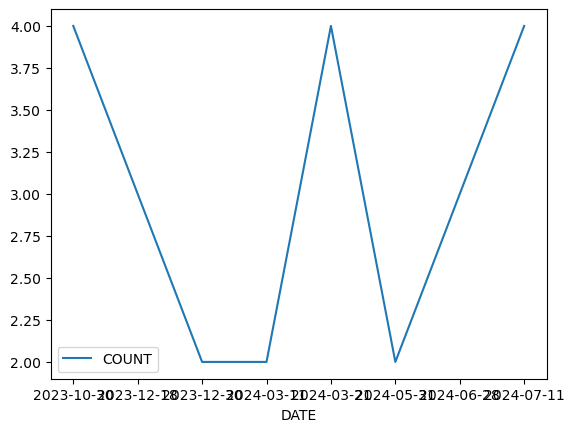

In [106]:
# plot random container
container = np.random.choice(changed)

print(container)

df = activityCounts[activityCounts['CONTAINER_ID'] == container]
df.plot(x='DATE', y='COUNT')

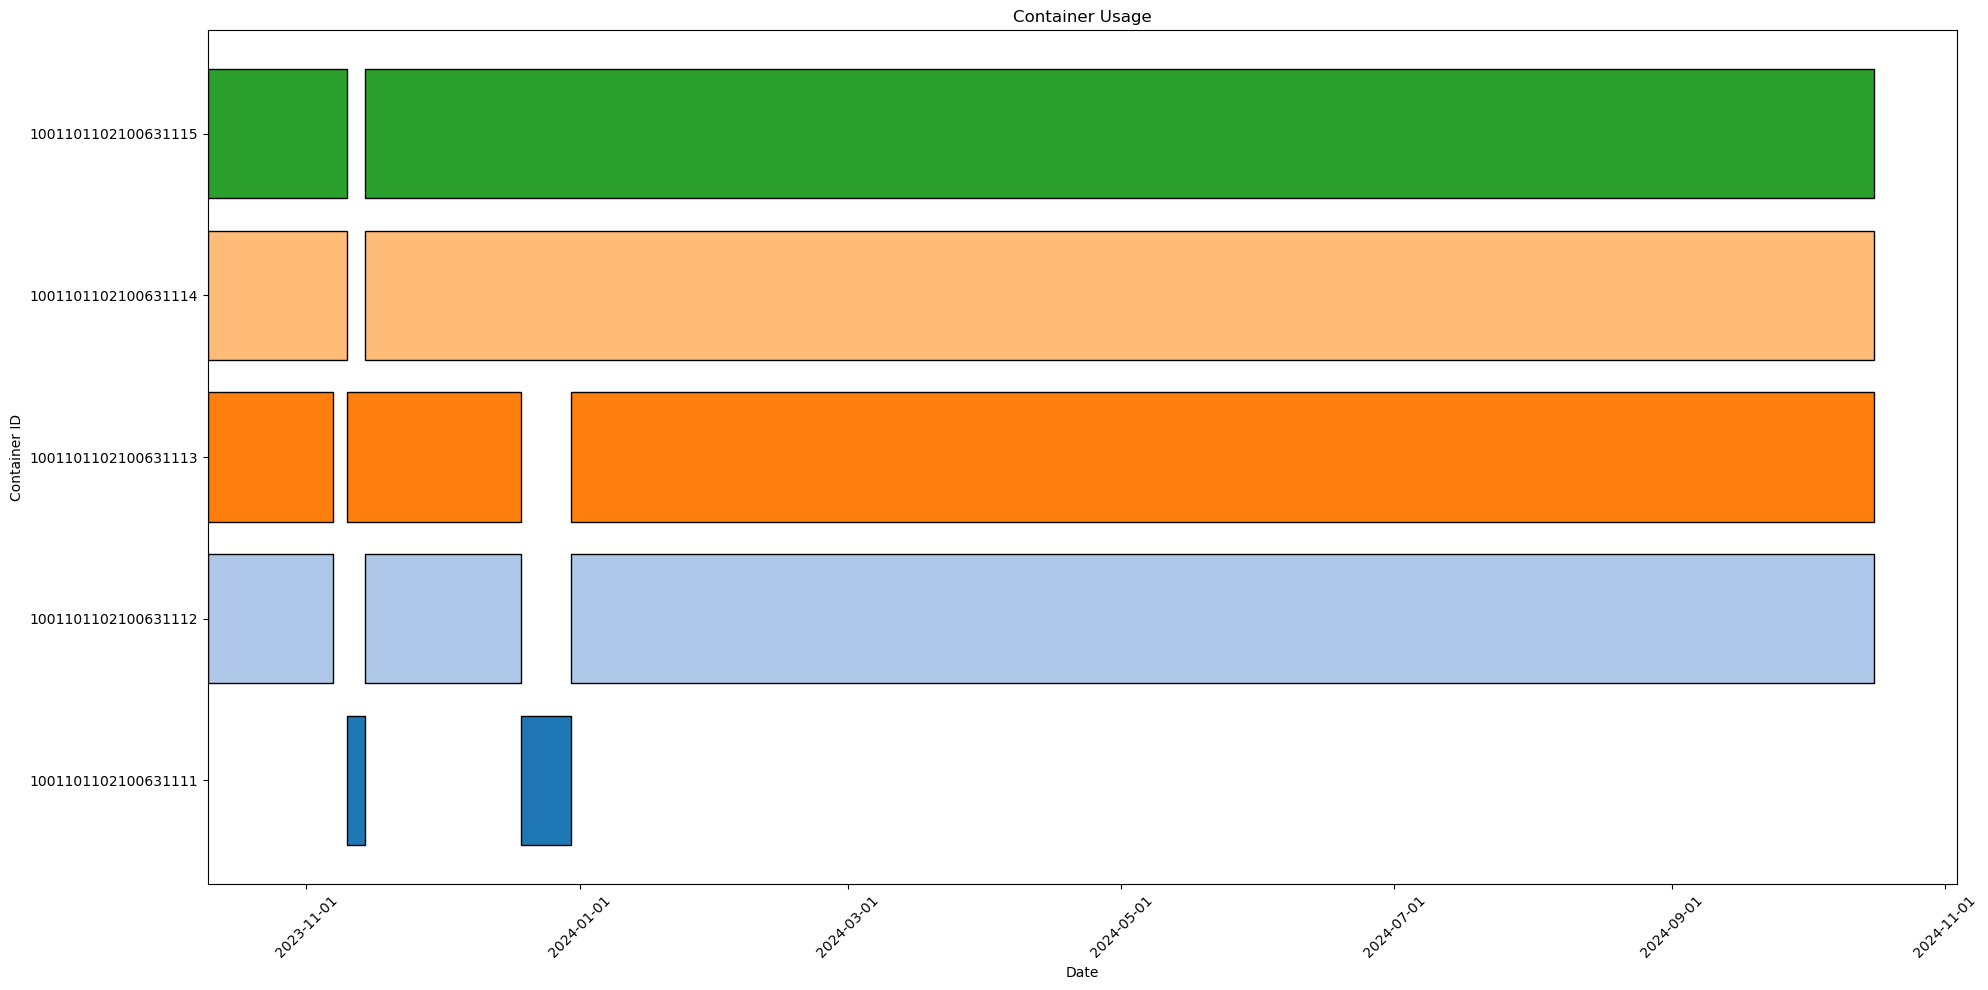

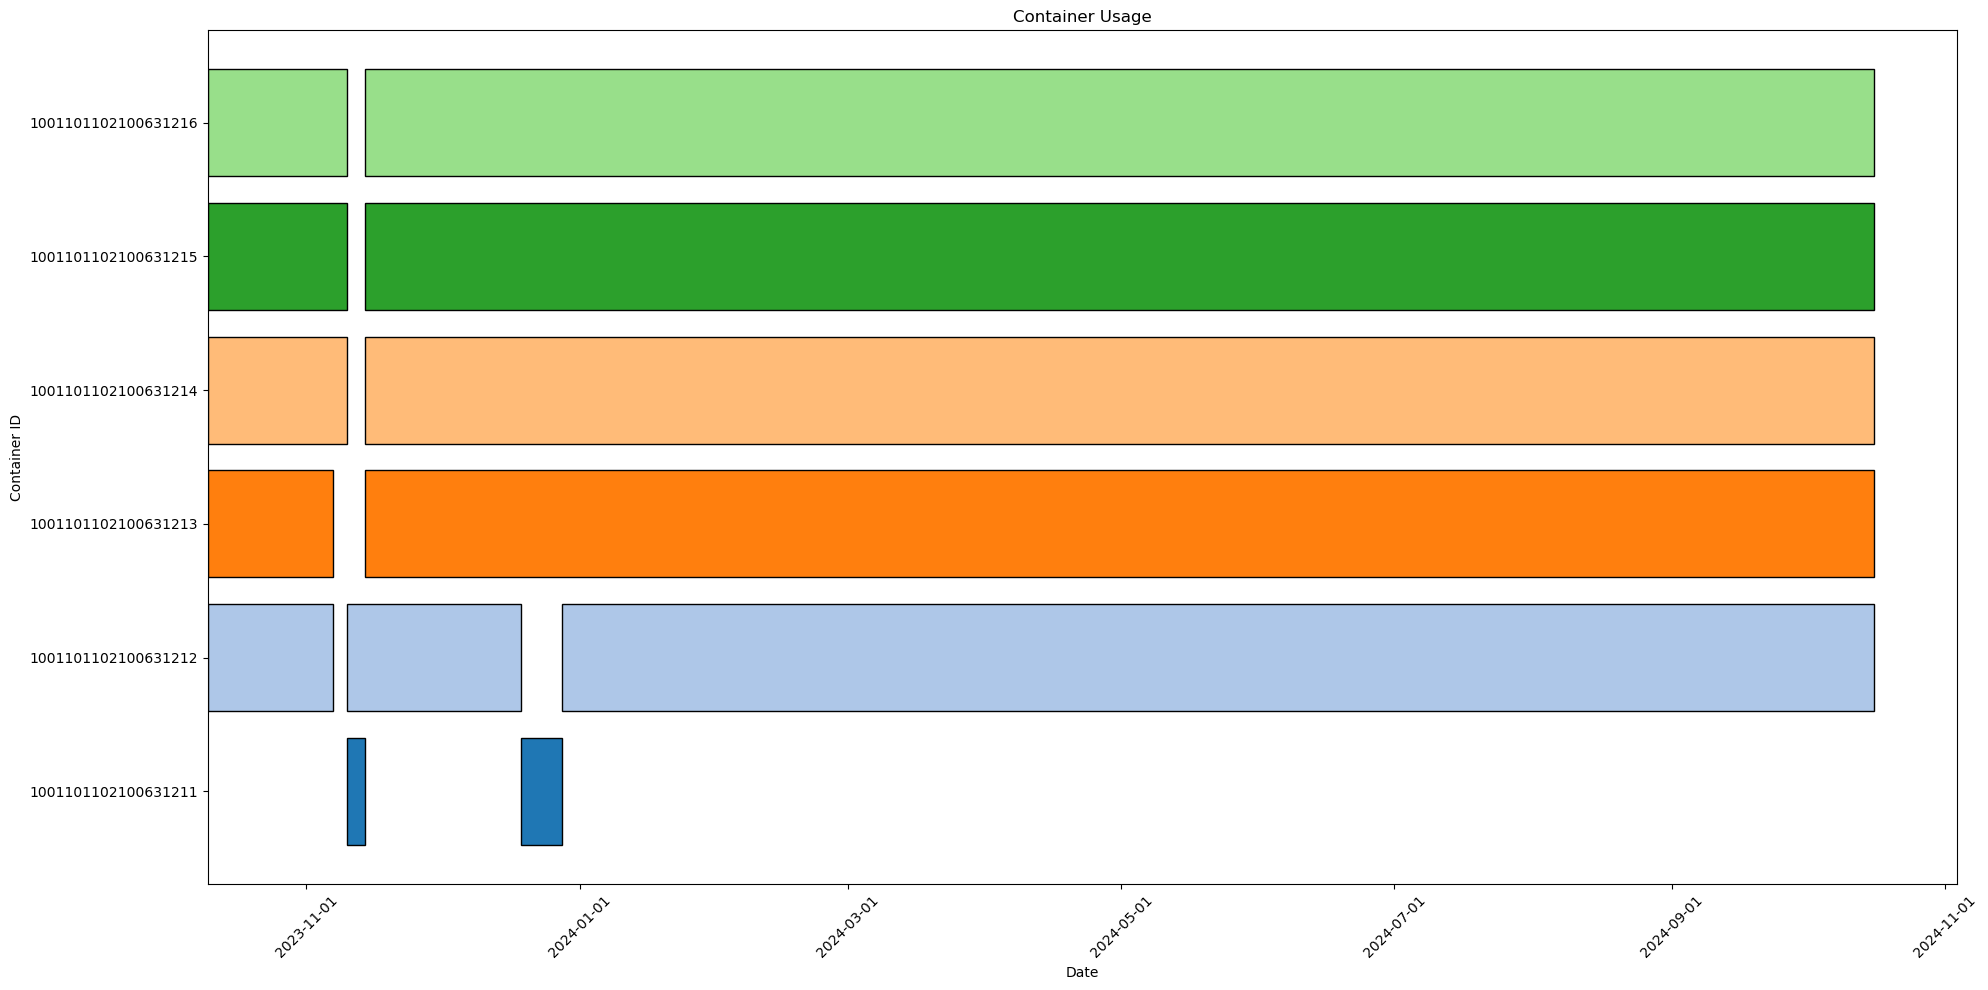

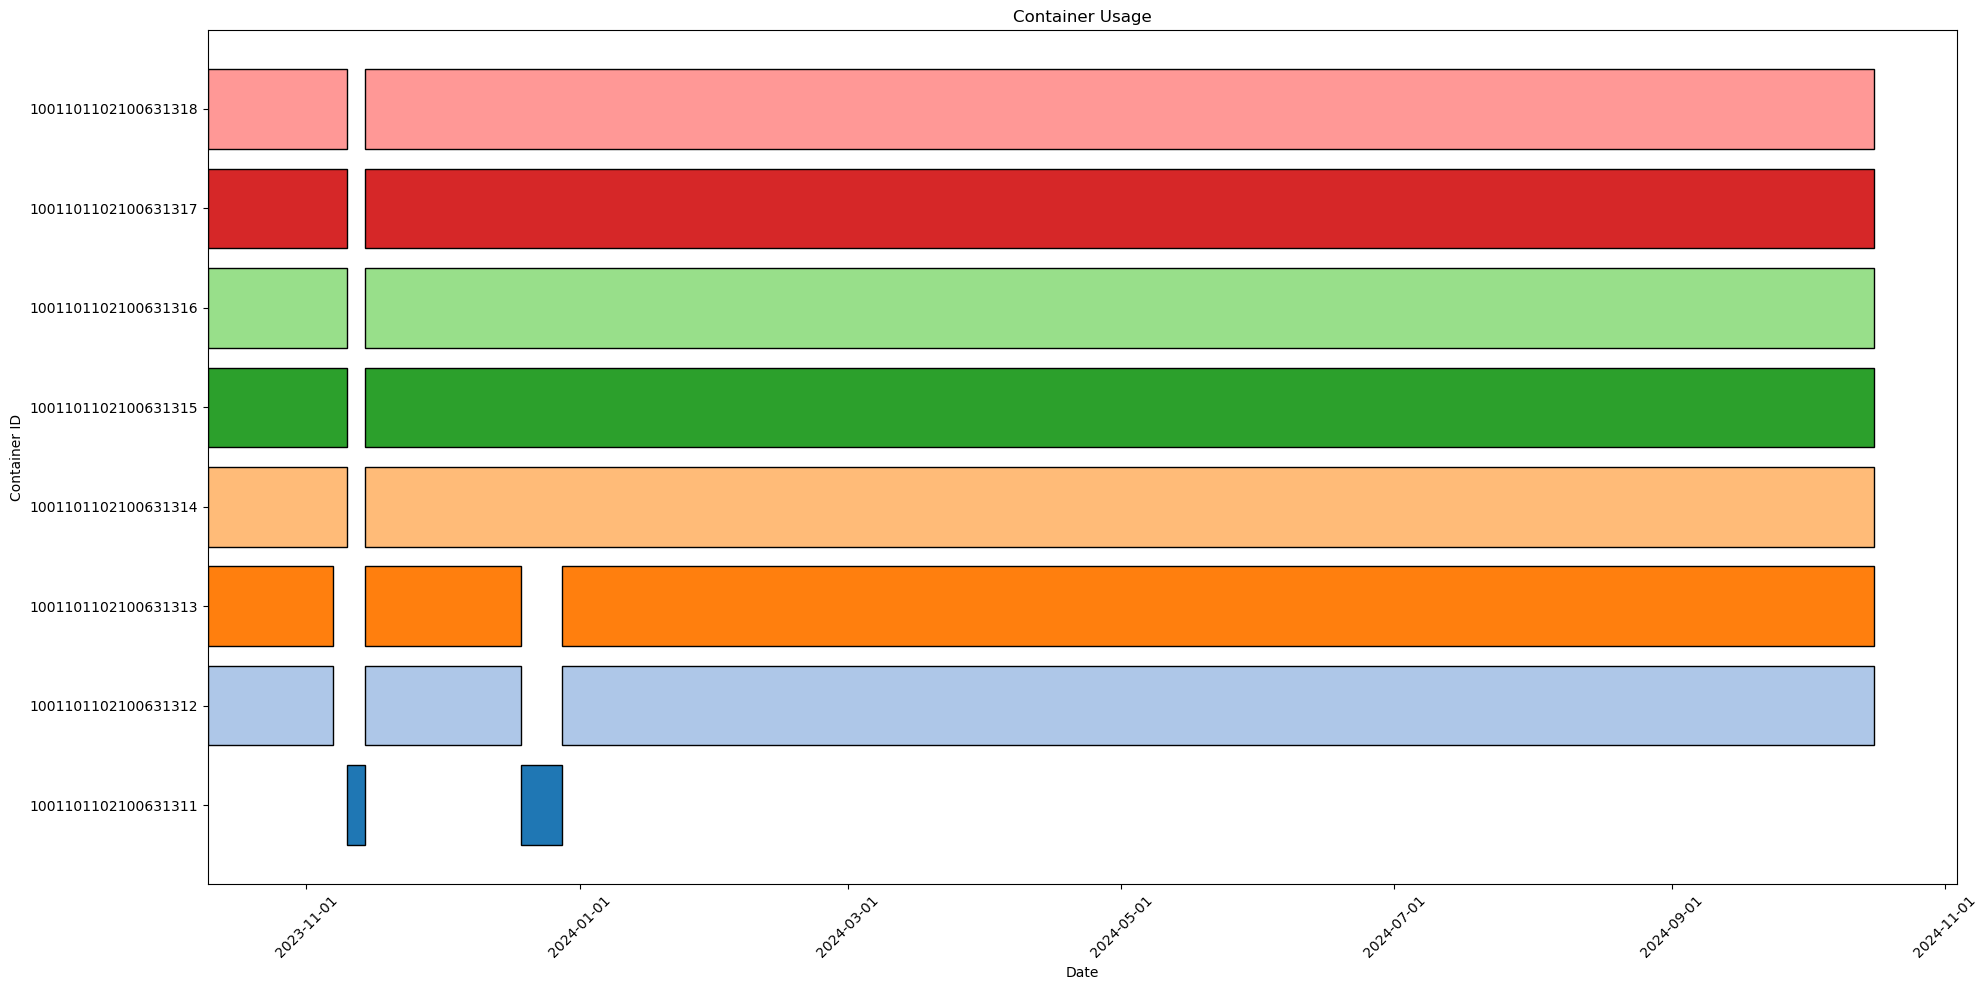

In [152]:
def plot_container_usage(loc, material):
    sampled = activityCounts[(activityCounts['LOCATION_ID'] == loc) & (activityCounts['MATERIAL_ID'] == material)]
    sampled = sampled.drop_duplicates(subset=['DATE', 'CONTAINER_ID'])
    sampled['DATE'] = pd.to_datetime(sampled['DATE'])
    sampled = sampled.pivot(index='DATE', columns='CONTAINER_ID', values='COUNT').isna()
    sampled.reset_index(inplace=True)
    sampled['END'] = sampled['DATE'].shift(-1)
    
    container_ids = sampled.columns[1:-1]
    
    colors = plt.cm.tab20.colors
    color_map = {container_id: colors[i % len(colors)] for i, container_id in enumerate(container_ids)}
    container_pos = {container_id: i for i, container_id in enumerate(container_ids)}
    
    fig, ax = plt.subplots(figsize=(20, 10))
    
    for container_id in container_ids:
        status = sampled[container_id]
        dates = sampled['DATE']
        ends = sampled['END']
        
        group_id = (status != status.shift()).cumsum()
        group_df = pd.DataFrame({'DATES': dates, 'ENDS': ends, 'STATUS': status, 'GROUP': group_id})
        intervals = []
        for gid, gdf in group_df.groupby('GROUP'):
            if gdf['STATUS'].iloc[0]:
                start = gdf['DATES'].iloc[0]
                end = gdf['ENDS'].iloc[-1]
                # end = gdf['DATES'].iloc[-1]
                
                if pd.isna(end):
                    end = gdf['DATES'].iloc[-1]
                
                intervals.append((start, end))
        
        y_pos = container_pos[container_id]
        for start, end in intervals:
            ax.barh(y_pos, end - start, left=start, height=0.8, color=color_map[container_id], edgecolor='black')
    
    ax.set_yticks(range(len(container_ids)))
    ax.set_yticklabels(container_ids)
    
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    
    ax.set_title('Container Usage')
    ax.set_xlabel('Date')
    ax.set_ylabel('Container ID')
    
    plt.tight_layout()
    plt.show()

# location = np.random.choice(changedLoc)
# location = 100110110210098
location = 100110110210063
materials = [11, 12, 13]

for material in materials:
    plot_container_usage(location, material)

In [108]:
df = data.activities
df[(df['LOCATION_ID'] == 100110110210063) & (df['MATERIAL_ID'] == 13) & (df['DATE'] == '2023-11-10')]

,TRANSACTION_ID,CONTAINER_ID,SLIDER_LEVEL,CV_LEVEL,SENSOR_LEVEL,IMAGE_ID,PHONE_ID,RECORDED_AT,COMMENT,IS_EMPTIED,LATITUDE,LONGITUDE,CREATED_AT,UPDATED_AT,ROUTE_ID,LOCATION_ID,MATERIAL_ID,DATE,INTERVAL,EMPTIED_INTERVAL
3737,6478,1001101102100631315,70,NaN,NaN,1001101102100631315/2023-11-11T08:52:59.815896...,TP1A.220624.014_1,2023-11-10 08:53:00,NaN,1,49.360554,7.669060,2023-11-10 08:16:48.0,NaN,NaN,100110110210063,13,2023-11-10,NaT,NaT
3739,6473,1001101102100631312,30,NaN,NaN,1001101102100631312/2023-11-11T08:53:14.208706...,TP1A.220624.014_1,2023-11-10 08:53:14,NaN,1,49.360554,7.669060,2023-11-10 08:16:45.0,NaN,NaN,100110110210063,13,2023-11-10,2 days 21:29:31,NaT
3749,6474,1001101102100631313,60,NaN,NaN,1001101102100631313/2023-11-11T09:15:07.223191...,TP1A.220624.014_1,2023-11-10 09:15:07,NaN,0,49.360554,7.669060,2023-11-10 08:16:47.0,NaN,NaN,100110110210063,13,2023-11-10,2 days 21:51:15,NaT
3750,6476,1001101102100631314,20,NaN,NaN,1001101102100631314/2023-11-11T09:15:15.347609...,TP1A.220624.014_1,2023-11-10 09:15:15,NaN,1,49.360554,7.669060,2023-11-10 08:16:47.0,NaN,NaN,100110110210063,13,2023-11-10,NaT,NaT
3751,6480,1001101102100631316,20,NaN,NaN,1001101102100631316/2023-11-11T09:16:08.826976...,TP1A.220624.014_1,2023-11-10 09:16:09,NaN,1,49.360554,7.669060,2023-11-10 08:16:49.0,NaN,NaN,100110110210063,13,2023-11-10,NaT,NaT
3756,6498,1001101102100631317,70,NaN,NaN,1001101102100631317/2023-11-11T09:17:20.666706...,TP1A.220624.014_1,2023-11-10 09:17:21,NaN,1,49.360486,7.668872,2023-11-10 08:22:10.0,NaN,NaN,100110110210063,13,2023-11-10,NaT,NaT
3757,6500,1001101102100631318,20,NaN,NaN,1001101102100631318/2023-11-11T09:17:32.025903...,TP1A.220624.014_1,2023-11-10 09:17:32,NaN,1,49.360486,7.668872,2023-11-10 08:22:11.0,NaN,NaN,100110110210063,13,2023-11-10,NaT,NaT
